In [1]:
from pykrige.ok3d import OrdinaryKriging3D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

In [3]:
carpeta = "C:/Users/Heber/Desktop/CRMVK NUBE MINERA 2019/Dataset/" #dirección de la carpeta que contiene el dataset
archivo = "dataset_3d.csv" #nombre de archivo con su respectiva extensión

df = pd.read_csv(carpeta + archivo, sep=";")
df.head()

,Este [X],Norte [Y],Cota [Z],Ley de Cobre [%],Tipo de roca
0,193.0,528.6,39.0,0.12,1
1,335.1,38.0,97.0,0.13,1
2,250.7,593.4,36.0,0.13,1
3,275.8,517.2,86.1,0.19,1
4,256.1,529.1,61.8,0.19,1


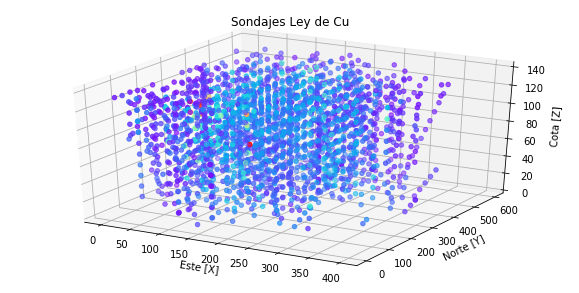

In [32]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection="3d")

x= df["Este [X]"]
y= df["Norte [Y]"]
z= df["Cota [Z]"]
cu=df["Ley de Cobre [%]"]

p = ax.scatter3D(x, y, z, c=cu, cmap="rainbow")

ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Cota [Z]")

ax.set_title("Sondajes Ley de Cu")
#fig.colobar(p, ax=ax)
plt.show()

In [4]:
x = np.array(df["Este [X]"])
y = np.array(df["Norte [Y]"])
z = np.array(df["Cota [Z]"])
val = np.array(df["Ley de Cobre [%]"])

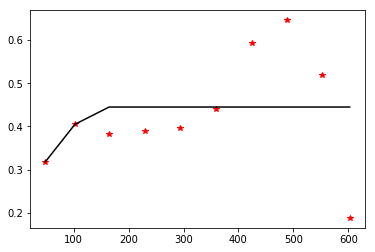

In [5]:
ok3d = OrdinaryKriging3D(x,y,z,val,variogram_model="spherical", nlags=10, enable_plotting=True, verbose=False)

In [6]:
gridx = np.linspace(0,410, num=41, endpoint=False)
gridy = np.linspace(0,610, num=61, endpoint=False)
gridz = np.linspace(0,150, num=15, endpoint=False)

In [7]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing="ij")

In [8]:
k3d, ss3d = ok3d.execute("grid", gridx, gridy, gridz)

In [9]:
k = k3d.ravel()
var_1 = ss3d.ravel()

In [10]:
z_g = zg.ravel()
x_g = xg.ravel()
y_g = yg.ravel()

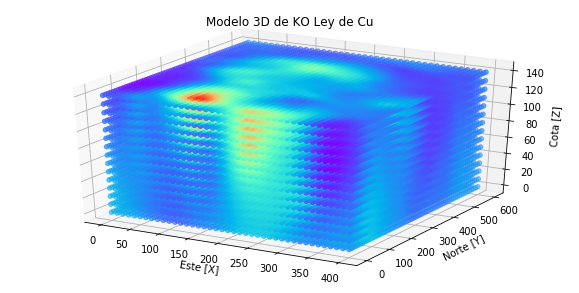

In [17]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection="3d")

xs,ys,zs = x_g, y_g, z_g

valores = k

p = ax.scatter3D(xs, ys, zs=zs, c=valores, cmap="rainbow")

ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Cota [Z]")

ax.set_title("Modelo 3D de KO Ley de Cu")
#fig.colobar(p, ax=ax)
plt.show()

In [13]:
d = {'Este [X]': x_g, 'Norte [Y]': y_g, 'Cota [Z]': z_g, 'Cobre_KO': k, 'Varianza': var_1}

df2 = pd.DataFrame(data=d)

df2.head()

,Este [X],Norte [Y],Cota [Z],Cobre_KO,Varianza
0,0.0,0.0,0.0,1.006240,0.405507
1,10.0,0.0,0.0,1.011323,0.396148
2,20.0,0.0,0.0,1.009314,0.386985
3,30.0,0.0,0.0,0.991618,0.378473
4,40.0,0.0,0.0,0.958668,0.370786


In [25]:
vari = np.array(df2["Varianza"])
media = np.array(df2["Cobre_KO"])

cv = np.sqrt(vari)/media

df2["cv"] = cv
df2.head()

,Este [X],Norte [Y],Cota [Z],Cobre_KO,Varianza,categoria,CV,cv,cat
0,0.0,0.0,0.0,1.006240,0.405507,0.632845,0.632845,0.632845,3
1,10.0,0.0,0.0,1.011323,0.396148,0.622356,0.622356,0.622356,3
2,20.0,0.0,0.0,1.009314,0.386985,0.616341,0.616341,0.616341,3
3,30.0,0.0,0.0,0.991618,0.378473,0.620402,0.620402,0.620402,3
4,40.0,0.0,0.0,0.958668,0.370786,0.635176,0.635176,0.635176,3


In [26]:
cat_ko = np.where(cv > 0.5, "3",
                  (np.where(cv < 0.25, "1", "2")))

In [28]:
df2["cat"] = cat_ko
df2.head()

,Este [X],Norte [Y],Cota [Z],Cobre_KO,Varianza,categoria,CV,cv,cat
0,0.0,0.0,0.0,1.006240,0.405507,0.632845,0.632845,0.632845,3
1,10.0,0.0,0.0,1.011323,0.396148,0.622356,0.622356,0.622356,3
2,20.0,0.0,0.0,1.009314,0.386985,0.616341,0.616341,0.616341,3
3,30.0,0.0,0.0,0.991618,0.378473,0.620402,0.620402,0.620402,3
4,40.0,0.0,0.0,0.958668,0.370786,0.635176,0.635176,0.635176,3


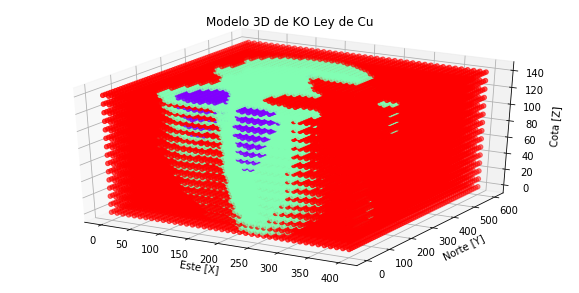

In [29]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection="3d")

xs,ys,zs = x_g, y_g, z_g

cat = df2["categoria"]

p = ax.scatter3D(xs, ys, zs=zs, c=cat_ko, cmap="rainbow")

ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Cota [Z]")

ax.set_title("Modelo 3D de KO Ley de Cu")
#fig.colobar(p, ax=ax)
plt.show()

In [ ]:
df2.to_csv(carpeta + "modelo3d_categorias.csv", index=False)